<a href="https://colab.research.google.com/github/Rizzyad/CampusRecruitment-Classifier/blob/main/Cls_CampusRecruitment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Dataset/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.shape

(215, 15)

In [ ]:
for col in df.columns:
  if df[col].dtypes == 'object':
    unique = df[col].unique()

    print(unique)

['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [ ]:
df['sl_no'].nunique()

215

In [ ]:
df = df.drop('sl_no', axis=1)
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df = df.fillna(df.median())
df.isnull().sum()

<ipython-input-8-fc04feaabb8e>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
target = df.pop('status')
df['status'] = target

df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,265000.0,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed


In [ ]:
df_num = df.copy()

df_num.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
salary            float64
status             object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_num.columns:
  if df_num[col].dtypes == 'object':
    df_num[col] = le.fit_transform(df_num[col])

df_num.dtypes

gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
salary            float64
status              int64
dtype: object

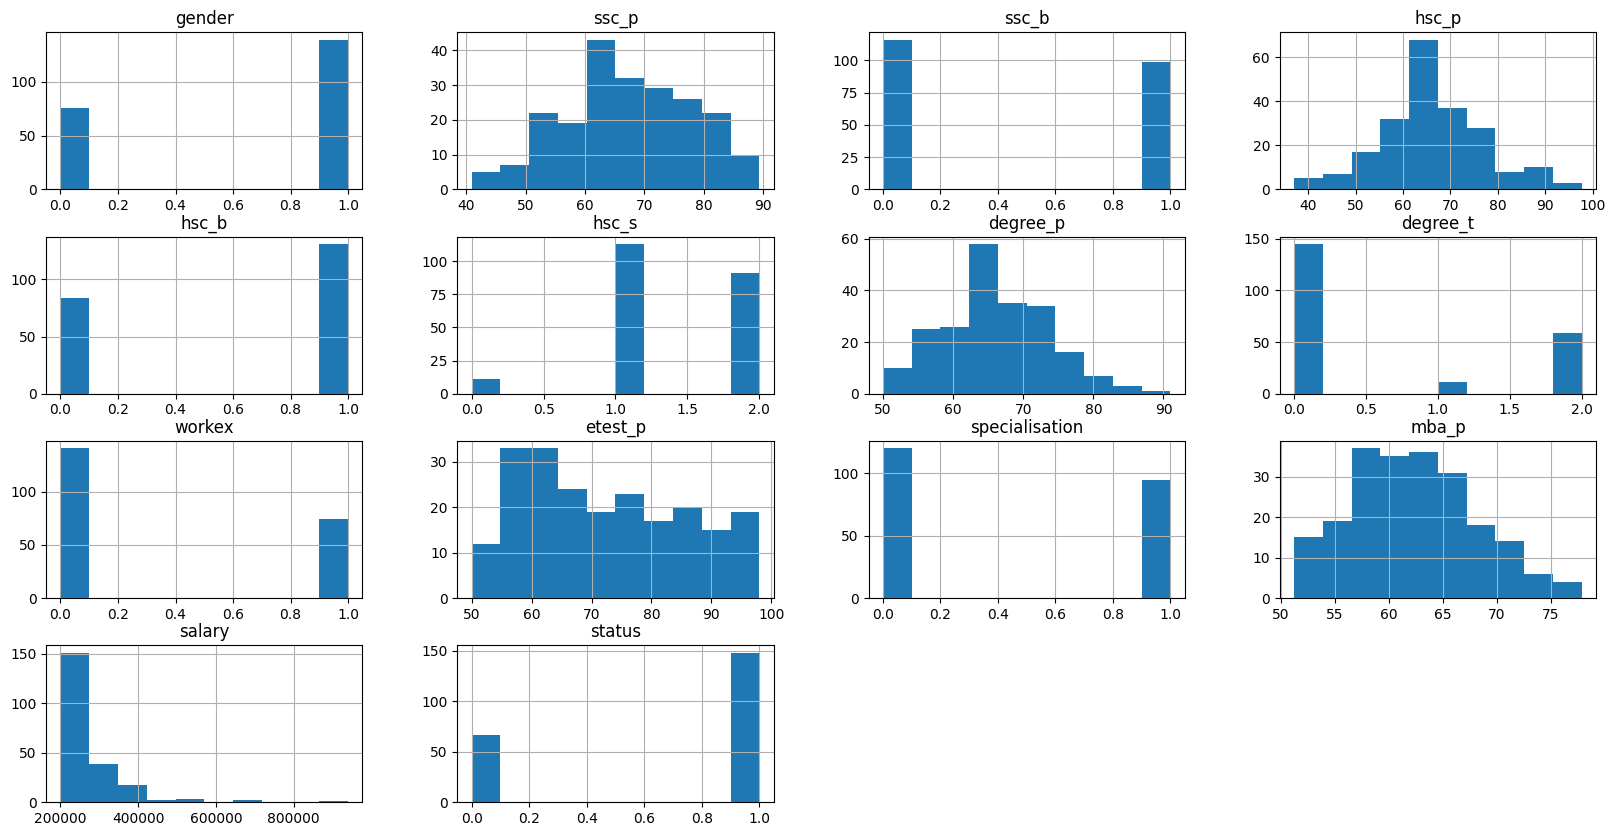

In [ ]:
ax = df_num.hist(figsize=(20,10))

<Axes: >

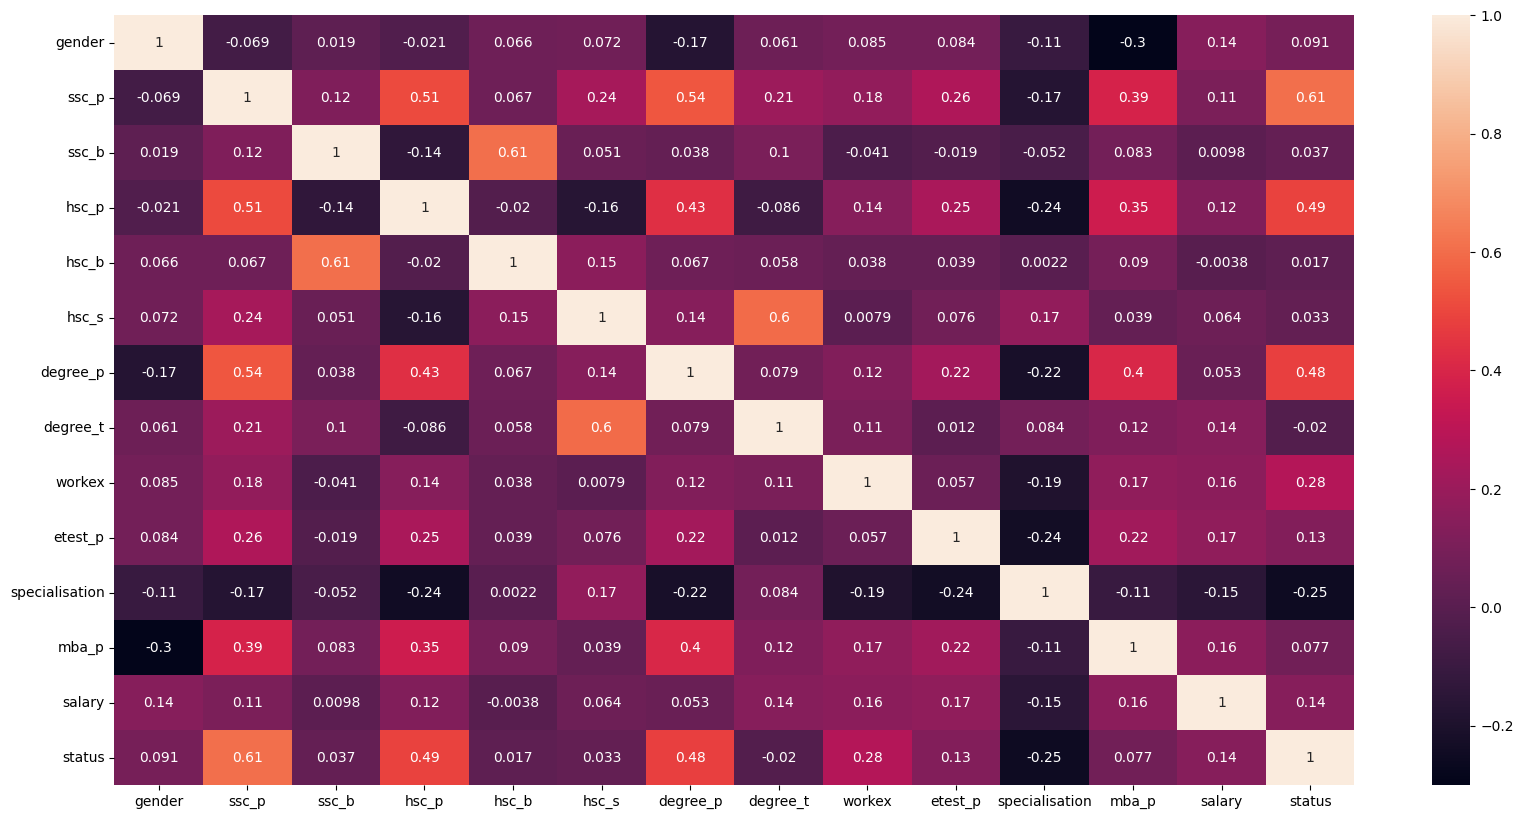

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(),annot=True)

In [ ]:
df1 = df_num.copy()

df1 = df1.drop('specialisation', axis=1)
df1.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'mba_p', 'salary', 'status'],
      dtype='object')

1    148
0     67
Name: status, dtype: int64

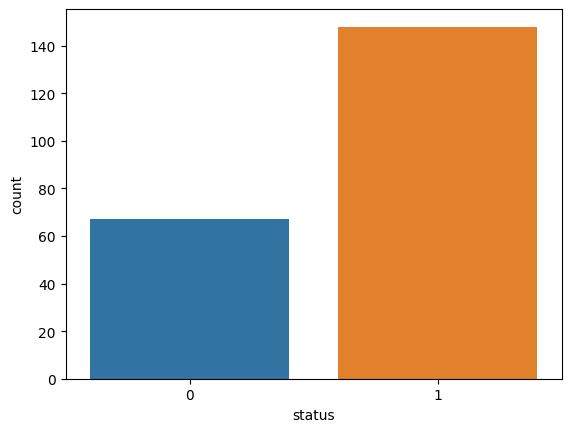

In [ ]:
sns.countplot(data=df1, x='status')
df1['status'].value_counts()

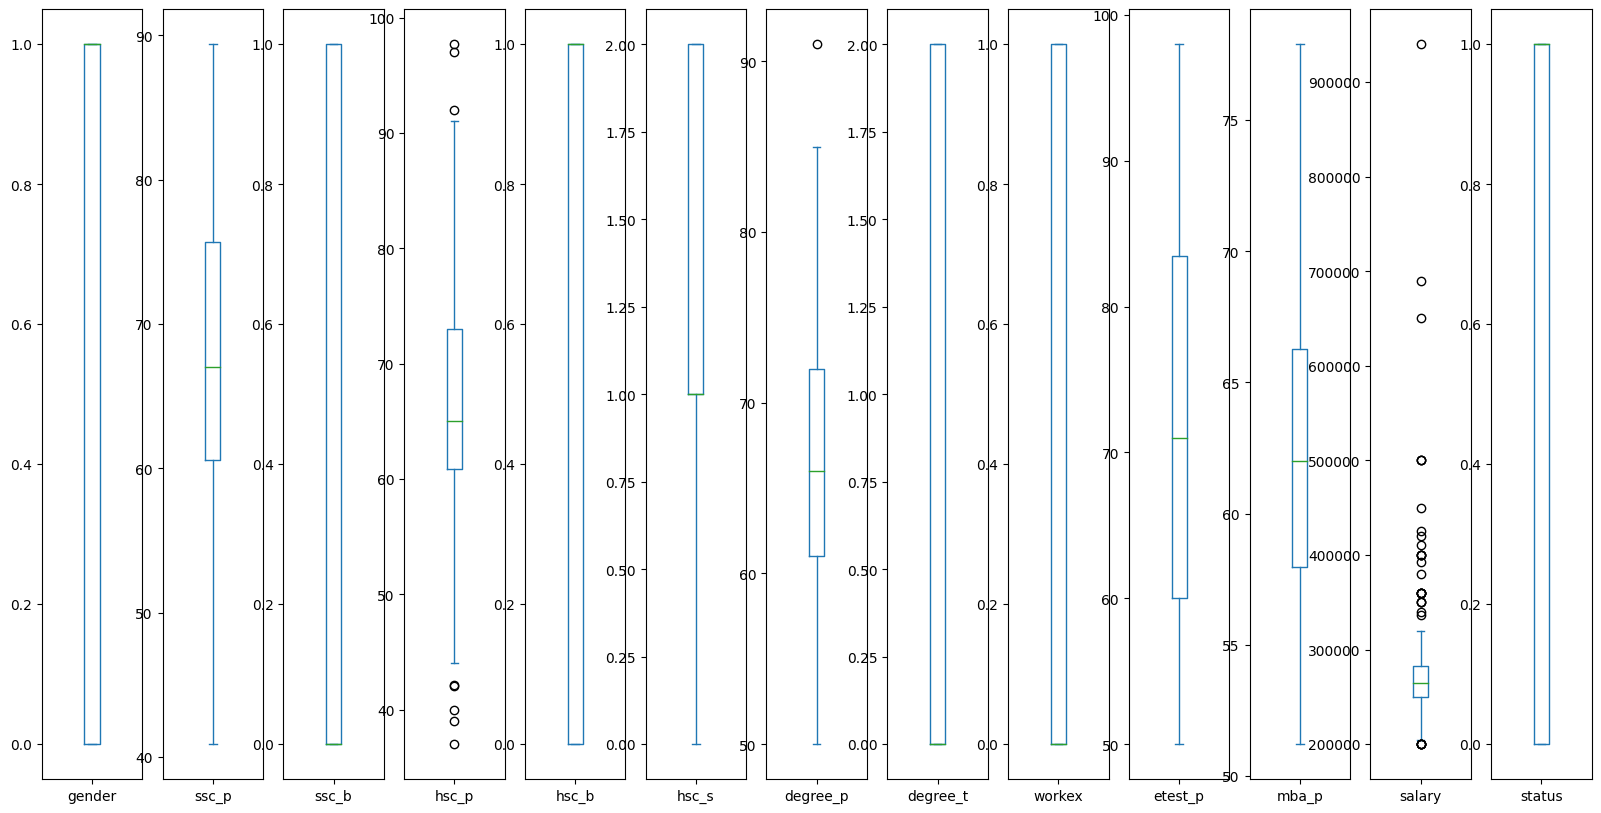

In [ ]:
ax = df1.plot(kind='box', subplots=True, figsize=(20,10))

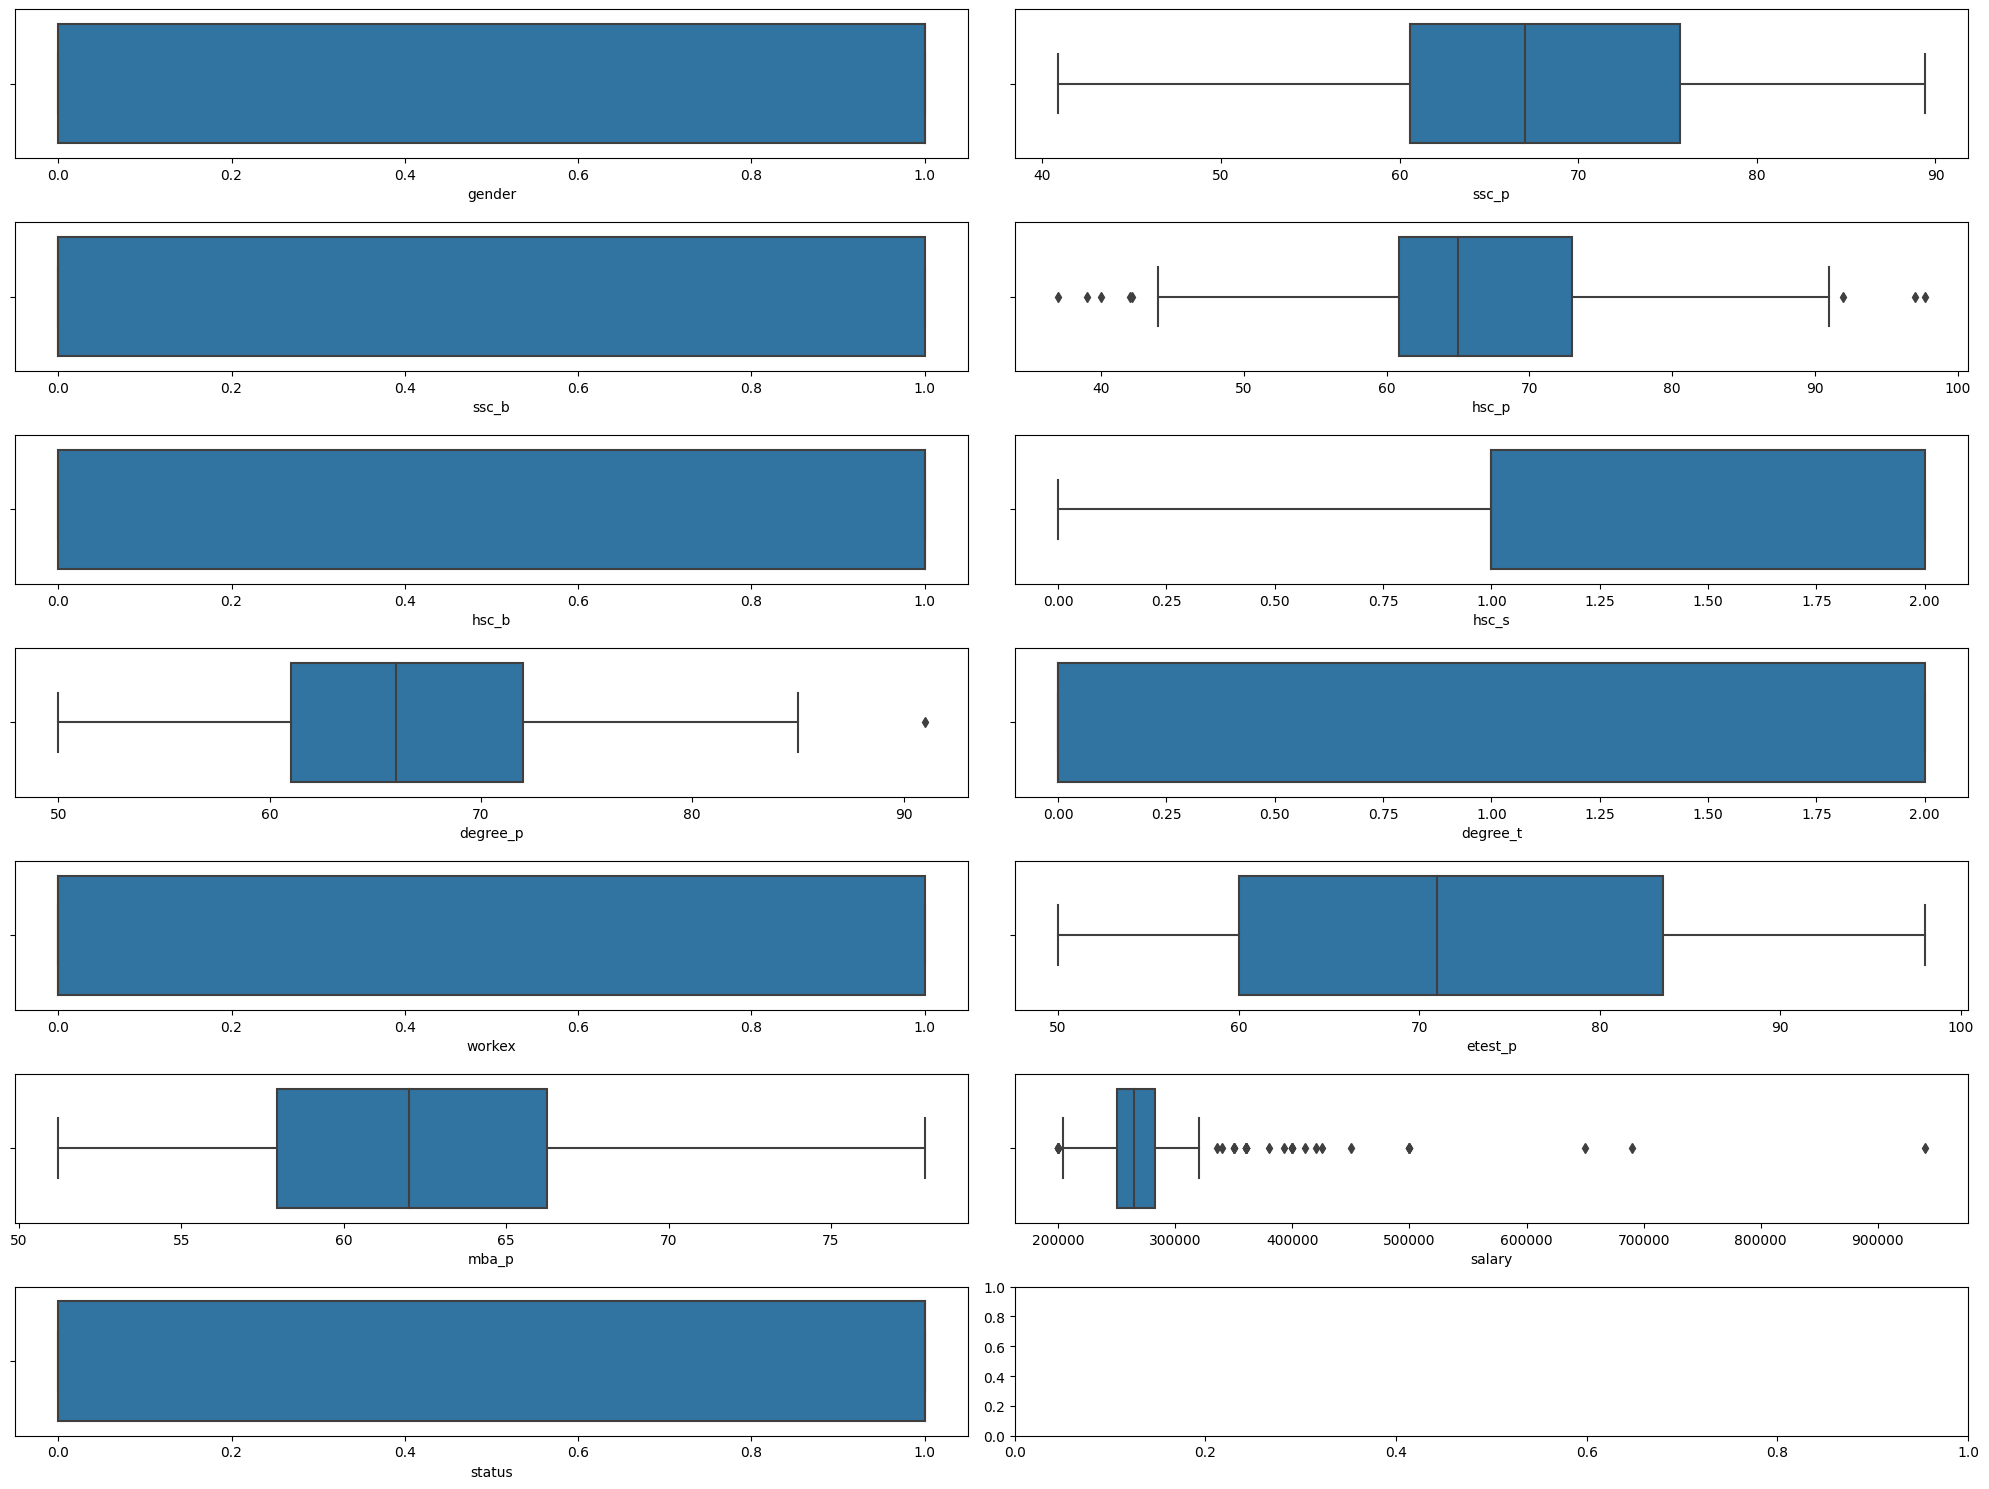

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20,15))
axes = axes.flatten()

for i, col in enumerate(df1.columns):
  sns.boxplot(x=df1[col], ax=axes[i])

plt.tight_layout()
plt.show()

In [ ]:
df1.shape

(215, 13)

In [ ]:
import scipy.stats as stats

z = np.abs(stats.zscore(df1))
df_clean = df1[(z<3).all(axis=1)]

df_clean.shape

(211, 13)

In [ ]:
X = df_clean.drop('status', axis=1)
y = df_clean['status']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sm = SMOTE(random_state=0)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

print('Sebelum Resample:', len(X_train))
print('Sesudah Resample:', len(X_train_res))

Sebelum Resample: 168
Sesudah Resample: 234


In [ ]:
cls = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000),
    SVC(probability=True),
    XGBClassifier(),
]

acc_dict = {}

log_cols = ['Classifier','Accuracy']
log = pd.DataFrame(columns=log_cols)

for clf in cls:
  name = clf.__class__.__name__
  clf.fit(X_train_res,y_train_res)
  y_pred = clf.predict(X_test)

  acc = accuracy_score(y_test,y_pred)
  acc_dict[name] = acc

for clf in acc_dict:
  log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
  log = log.append(log_entry)

<ipython-input-23-734d5caa22b4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-23-734d5caa22b4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-23-734d5caa22b4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-23-734d5caa22b4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-23-734d5caa22b4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipyt

<Axes: xlabel='Accuracy', ylabel='Classifier'>

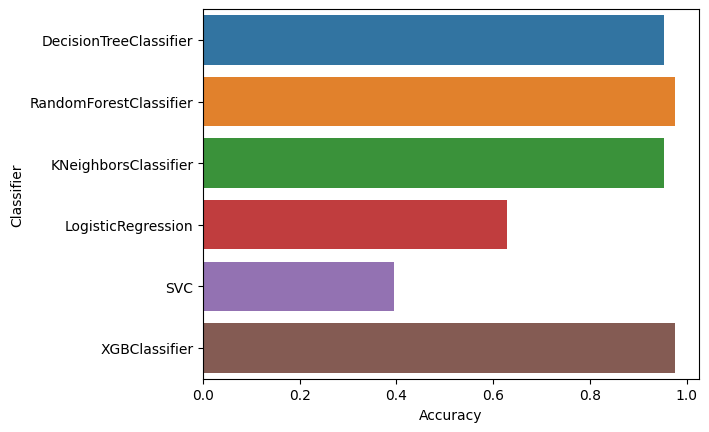

In [ ]:
plt.xlabel('Accuracy')
plt.ylabel('Classifier')

sns.barplot(data=log, x='Accuracy',y='Classifier')

In [ ]:
log.sort_values(by=['Accuracy'], ascending=False)

,Classifier,Accuracy
0,RandomForestClassifier,0.976744
0,XGBClassifier,0.976744
0,DecisionTreeClassifier,0.953488
0,KNeighborsClassifier,0.953488
0,LogisticRegression,0.627907
0,SVC,0.395349


In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train_res, y_train_res)
y_pred2 = rf.predict(X_train_res)
y_pred = rf.predict(X_test)

print(accuracy_score(y_train_res,y_pred2))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
0.9767441860465116
[[16  0]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.96      0.98        27

    accuracy                           0.98        43
   macro avg       0.97      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



In [ ]:
def clf_model(model):
  scores = cross_val_score(model,X,y,cv=10)

  print(scores)
  print(scores.mean())

In [ ]:
clf_model(RandomForestClassifier())

[1.         1.         0.80952381 1.         0.95238095 0.95238095
 1.         0.80952381 1.         0.9047619 ]
0.9428571428571428


In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt


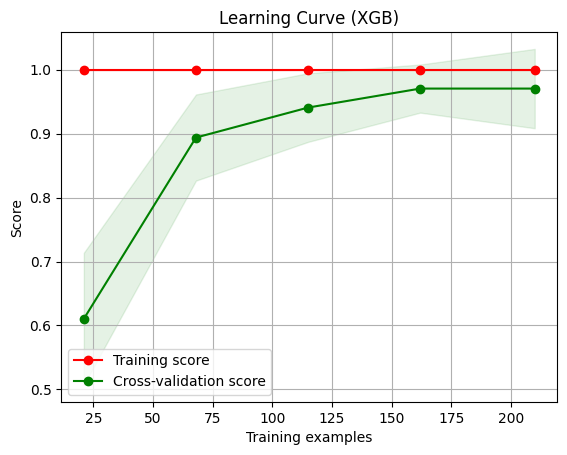

In [ ]:
xgb = XGBClassifier()

title = "Learning Curve (XGB)"
plot_learning_curve(rf, title, X_train_res, y_train_res, cv=10)

plt.show()

In [ ]:
import joblib

joblib.dump(rf, '/content/drive/MyDrive/Model/CampusRecruitmentRF.joblib')

['/content/drive/MyDrive/Model/CampusRecruitmentRF.joblib']

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 214
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    211 non-null    int64  
 1   ssc_p     211 non-null    float64
 2   ssc_b     211 non-null    int64  
 3   hsc_p     211 non-null    float64
 4   hsc_b     211 non-null    int64  
 5   hsc_s     211 non-null    int64  
 6   degree_p  211 non-null    float64
 7   degree_t  211 non-null    int64  
 8   workex    211 non-null    int64  
 9   etest_p   211 non-null    float64
 10  mba_p     211 non-null    float64
 11  salary    211 non-null    float64
 12  status    211 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 23.1 KB


In [ ]:
import gradio as gr

# Memuat model
model = joblib.load('/content/drive/MyDrive/Model/CampusRecruitmentRF.joblib')

def predict_campus(gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, mba_p, salary):
  input_dict = {'gender':gender,
                'ssc_p':ssc_p,
                'ssc_b':ssc_b,
                'hsc_p':hsc_p,
                'hsc_b':hsc_b,
                'hsc_s':hsc_s,
                'degree_p':degree_p,
                'degree_t':degree_t,
                'workex':workex,
                'etest_p':etest_p,
                'mba_p':mba_p,
                'salary':salary}

  input_df = pd.DataFrame([input_dict])
  prediction = model.predict(input_df)[0]

  return prediction

In [ ]:
df_clean.dtypes

gender        int64
ssc_p       float64
ssc_b         int64
hsc_p       float64
hsc_b         int64
hsc_s         int64
degree_p    float64
degree_t      int64
workex        int64
etest_p     float64
mba_p       float64
salary      float64
status        int64
dtype: object

In [ ]:
gr.Interface(predict_campus,
             inputs = ['number','number','number','number','number','number','number','number','number','number','number','number'],
             outputs = ['number'],
             interpretation='default',
             title='Campus Recruitment').launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
df_clean.sample(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_p,salary,status
14,1,62.0,0,47.0,0,1,50.0,0,0,76.00,54.96,265000.0,0
21,0,79.0,1,76.0,1,1,85.0,0,0,95.00,69.06,393000.0,1
60,1,74.0,0,70.0,0,2,72.0,0,1,60.00,57.24,260000.0,1
144,1,52.0,1,50.0,1,0,61.0,0,0,60.00,58.52,265000.0,0
183,1,65.0,0,77.0,0,1,69.0,0,0,60.00,61.82,276000.0,1
180,1,65.0,0,71.5,1,1,62.8,0,1,57.00,56.60,265000.0,1
8,1,73.0,0,79.0,0,1,72.0,0,0,91.34,61.29,231000.0,1
179,0,77.8,0,64.0,0,2,64.2,2,0,75.50,72.14,265000.0,0
18,0,63.0,0,66.0,0,1,64.0,0,0,68.00,64.08,265000.0,0
98,0,69.0,0,73.0,0,1,65.0,0,0,70.00,57.31,220000.0,1
